In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 4]

import seaborn as sns
sns.set_theme(palette="Set2")

# 1. Date and Volume column till may 2023

In [2]:
df = pd.read_csv("incoming_till_may23.csv")
df

,date,container_volumn
0,2023-04-24,11.0
1,2023-04-24,11.0
2,2022-08-10,11.0
3,2022-08-23,11.0
4,2022-08-24,11.0
...,...,...
61146,2023-01-25,8.0
61147,2023-05-30,8.0
61148,2023-01-18,8.0
61149,2023-02-16,8.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61151 entries, 0 to 61150
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              61151 non-null  object 
 1   container_volumn  61151 non-null  float64
dtypes: float64(1), object(1)
memory usage: 955.6+ KB


# 2.Converting date to date format 

In [4]:
# Assuming 'timestamp' is the column containing the irregular timestamps and 'value' is the column containing the volume data
df['date'] = pd.to_datetime(df['date'],format="%Y/%m/%d")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61151 entries, 0 to 61150
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              61151 non-null  datetime64[ns]
 1   container_volumn  61151 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 955.6 KB


In [6]:
df.isnull().sum()

date                0
container_volumn    0
dtype: int64

In [7]:
#df['container_volumn'] = df['container_volumn'].replace(0, pd.NA)

In [8]:
df.isnull().sum()

date                0
container_volumn    0
dtype: int64

# 3.Resampling::: setting index to date and sampling daily data & replacing 0 values of sum to nan

In [9]:
# Set the 'timestamp' column as the index to create a DatetimeIndex
df.set_index('date', inplace=True)

# Resample to hourly frequency and sum values for each day
df = df.resample('D').sum()


In [10]:
df.head()

,container_volumn
date,
2021-01-01,99.0
2021-01-02,15.0
2021-01-03,50.0
2021-01-04,61.0
2021-01-05,63.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2021-01-01 to 2023-05-31
Freq: D
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   container_volumn  881 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB


In [12]:
min(df.index)

Timestamp('2021-01-01 00:00:00', freq='D')

In [13]:
max(df.index)

Timestamp('2023-05-31 00:00:00', freq='D')

In [14]:
all_datetimes = pd.date_range(min(df.index), max(df.index), freq="D")
all_datetimes

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', length=881, freq='D')

In [15]:
all_datetimes.shape

(881,)

In [16]:
#df.to_csv('abc.csv', index=True, encoding='utf-8-sig')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2021-01-01 to 2023-05-31
Freq: D
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   container_volumn  881 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB


In [18]:
df['container_volumn'] = df['container_volumn'].replace(0, np.nan)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2021-01-01 to 2023-05-31
Freq: D
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   container_volumn  864 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB


In [20]:
df.head()

,container_volumn
date,
2021-01-01,99.0
2021-01-02,15.0
2021-01-03,50.0
2021-01-04,61.0
2021-01-05,63.0


In [21]:
df.isnull().sum()

container_volumn    17
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2021-01-01 to 2023-05-31
Freq: D
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   container_volumn  864 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB


In [23]:
#df['container_volumn'] = df['container_volumn'].astype(float)

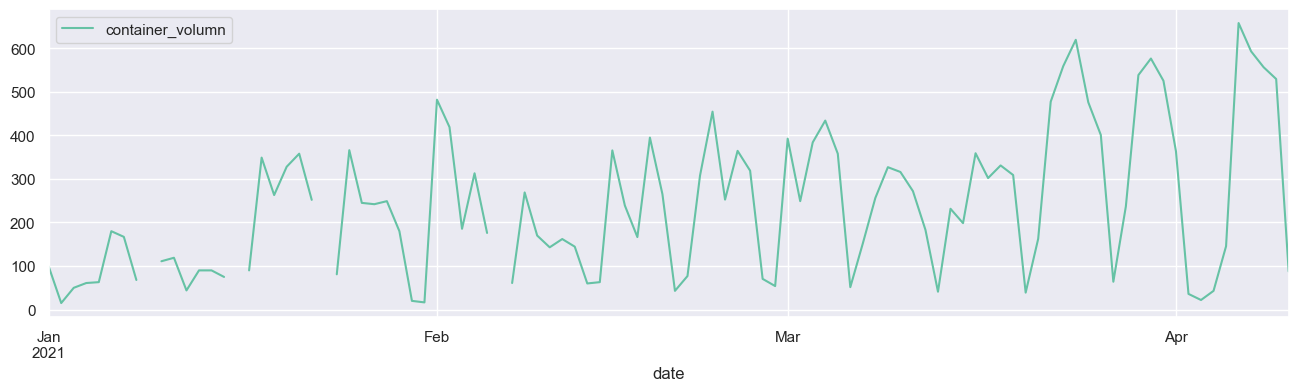

In [24]:
plot = df.head(100).plot()

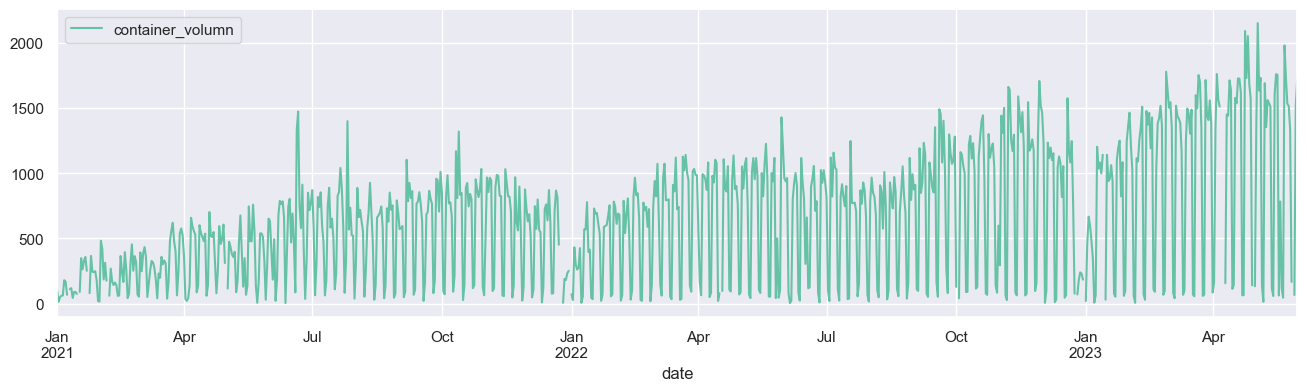

In [25]:
plot = df.head(881).plot()

In [26]:
year_monthly_counts = df.groupby([df.index.year, df.index.month]).size()

# Group the data by year and count the records for each year
yearly_counts = df.groupby(df.index.year).size()

# Print the monthly counts
print("Yearly and Monthly Counts:")
print(year_monthly_counts)

Yearly and Monthly Counts:
date  date
2021  1       31
      2       28
      3       31
      4       30
      5       31
      6       30
      7       31
      8       31
      9       30
      10      31
      11      30
      12      31
2022  1       31
      2       28
      3       31
      4       30
      5       31
      6       30
      7       31
      8       31
      9       30
      10      31
      11      30
      12      31
2023  1       31
      2       28
      3       31
      4       30
      5       31
dtype: int64


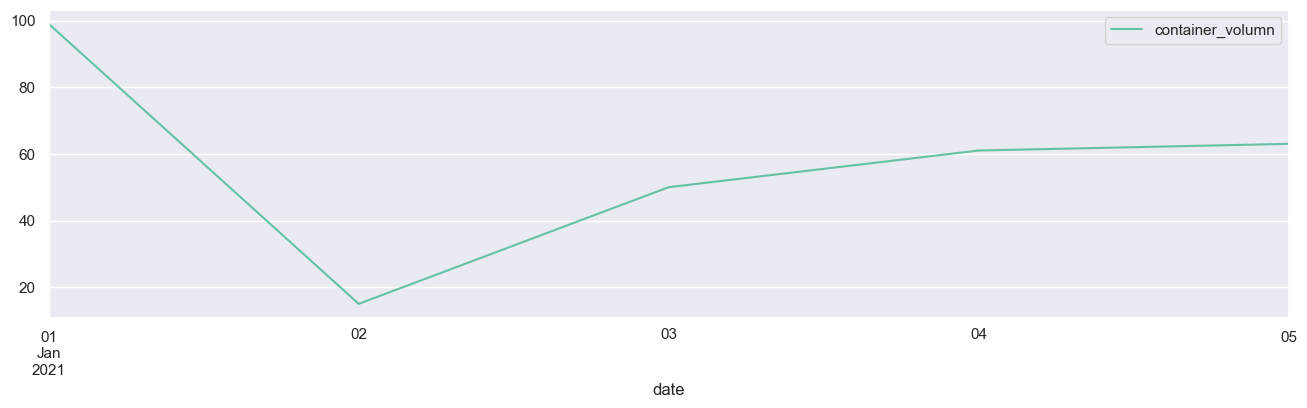

In [27]:
plot = df.head().plot()

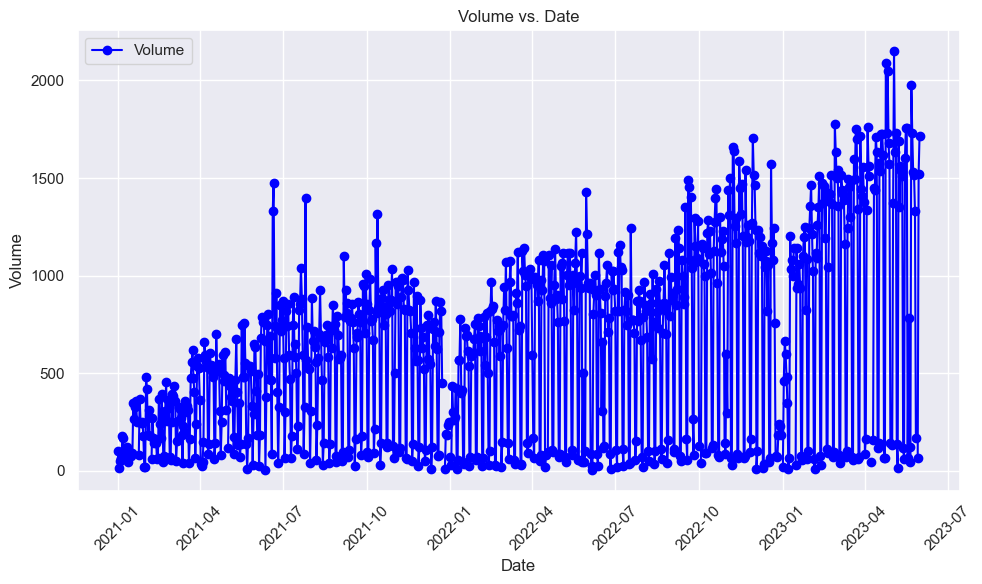

In [28]:
# Plot graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['container_volumn'], marker='o', linestyle='-', color='b', label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume vs. Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df.to_csv('daily_incoming_orders.csv', index=True, encoding='utf-8-sig')

# 4.Missing values: Interpolation method

In [30]:
df.isnull().sum()

container_volumn    17
dtype: int64

In [31]:
df["interpolated"] = df["container_volumn"].interpolate(method="linear", axis=0)
df.head(12)

,container_volumn,interpolated
date,,
2021-01-01,99.0,99.0
2021-01-02,15.0,15.0
2021-01-03,50.0,50.0
2021-01-04,61.0,61.0
2021-01-05,63.0,63.0
2021-01-06,180.0,180.0
2021-01-07,167.0,167.0
2021-01-08,68.0,68.0
2021-01-09,NaN,89.5


In [32]:
df.isnull().sum()

container_volumn    17
interpolated         0
dtype: int64

In [33]:
#df.to_csv('aaa.csv', index=True, encoding='utf-8-sig')

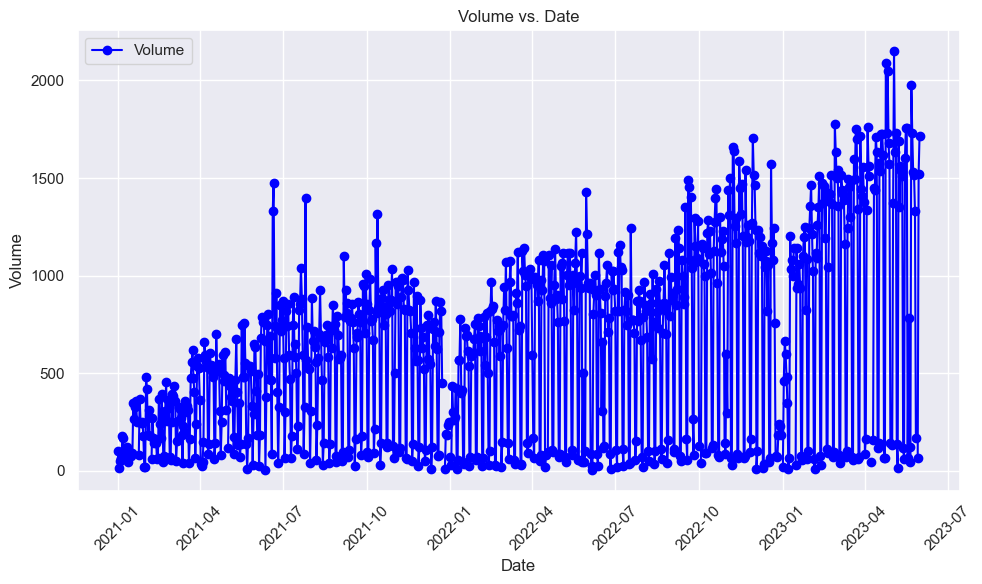

In [34]:
# Plot graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['container_volumn'], marker='o', linestyle='-', color='b', label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume vs. Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

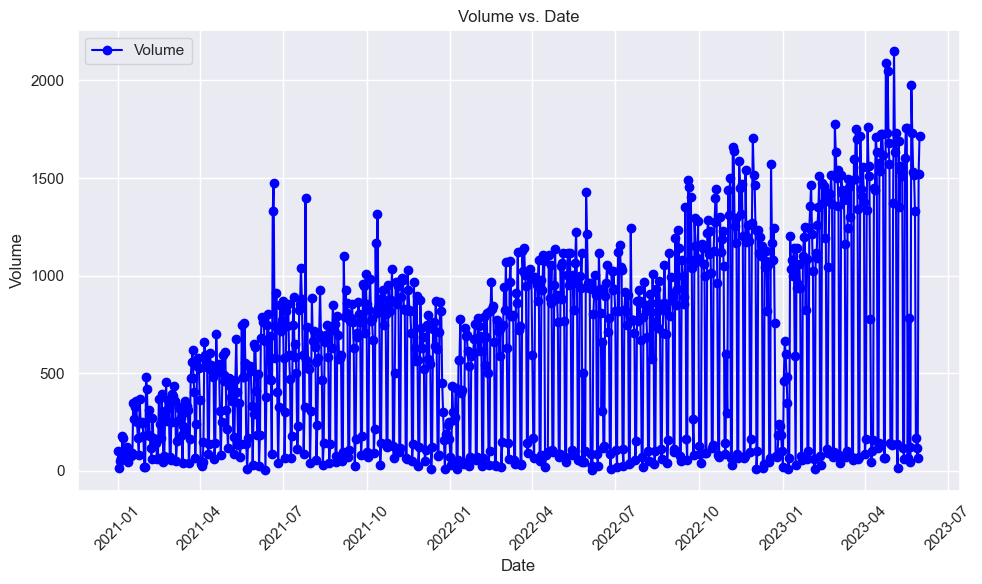

In [35]:
# Plot graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['interpolated'], marker='o', linestyle='-', color='b', label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume vs. Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
df.isnull().sum()

container_volumn    17
interpolated         0
dtype: int64

In [37]:
column_drop = 'container_volumn'
df = df.drop(column_drop, axis =1)

In [38]:
df.head()

,interpolated
date,
2021-01-01,99.0
2021-01-02,15.0
2021-01-03,50.0
2021-01-04,61.0
2021-01-05,63.0


In [39]:
 df.shape

(881, 1)

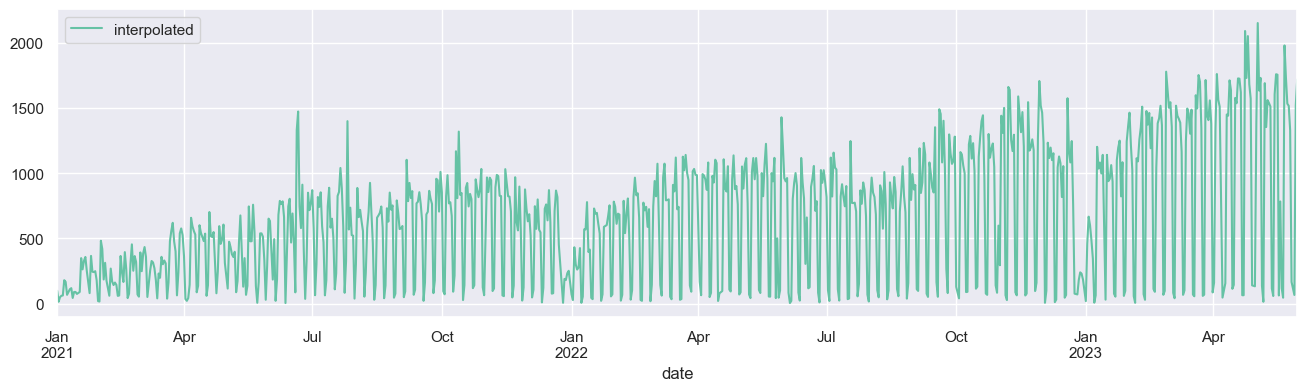

In [40]:
plot = df.head(881).plot()

In [41]:
df = df.rename(columns={'interpolated': 'volume'})

In [42]:
df.head()

,volume
date,
2021-01-01,99.0
2021-01-02,15.0
2021-01-03,50.0
2021-01-04,61.0
2021-01-05,63.0


# 5.FINAL FILE WITH 881 RECORDS 

In [43]:
df.to_csv('incoming_daily_till2023may_interpolated.csv', index=True, encoding='utf-8-sig')

# 6. Decomposition of the time series

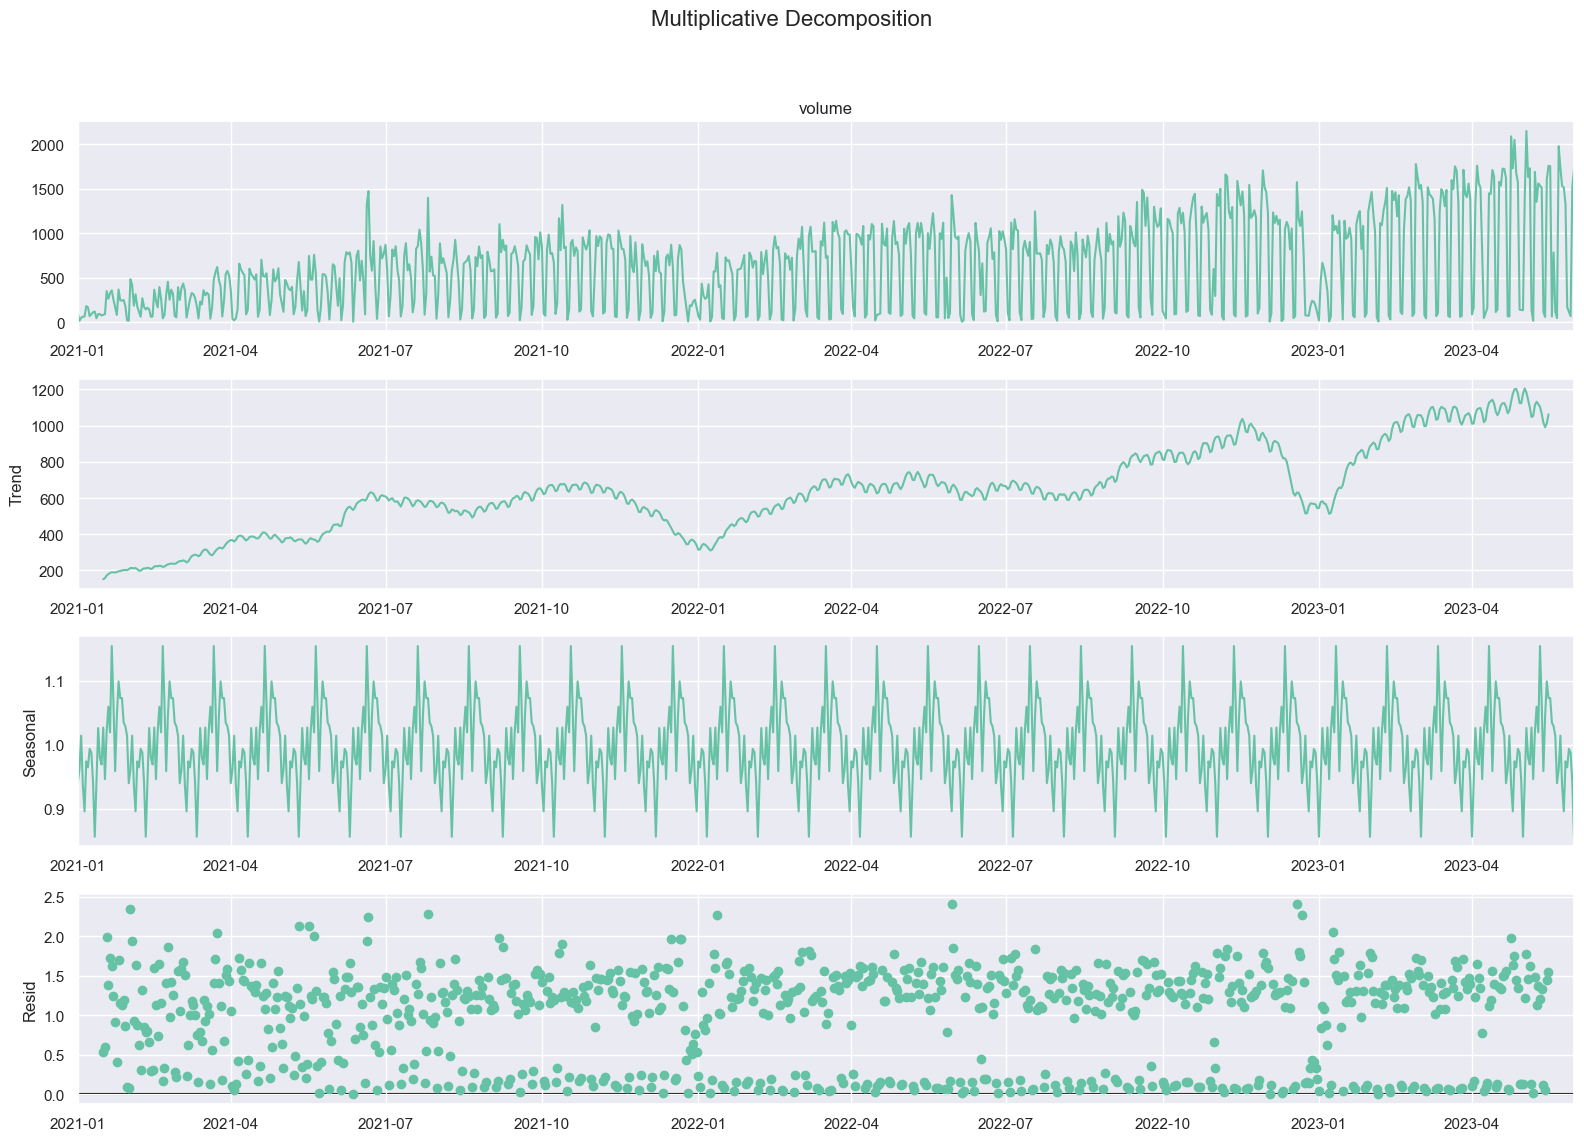

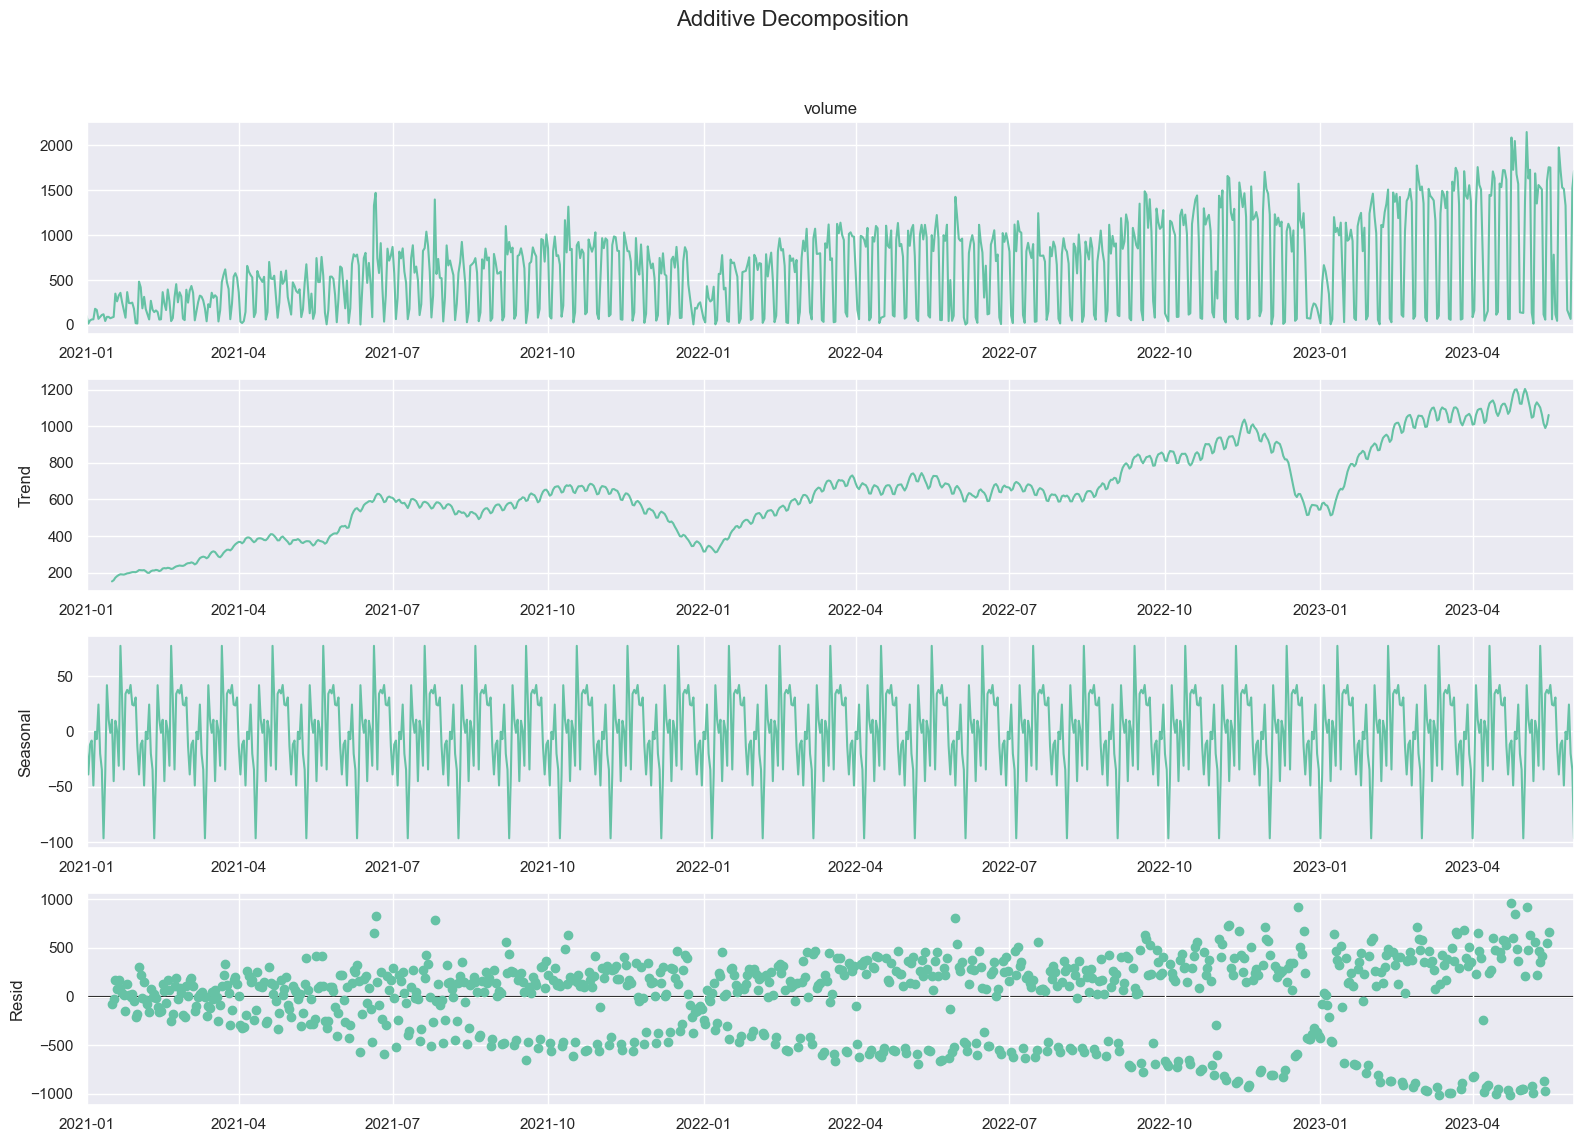

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['volume'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['volume'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


# Stationary vs non stationary

# white noise and random walk

In [44]:
def random_walk(obs=881, d=1):
    """
    :param: obs: number of observations
    :param: d: number of dimensions
    """
    return np.cumsum(np.random.normal(0, 0.5, (obs, d)))

def white_noise(obs=881, d=1):
    return np.random.normal(0, 0.5, (obs, d)).flatten()

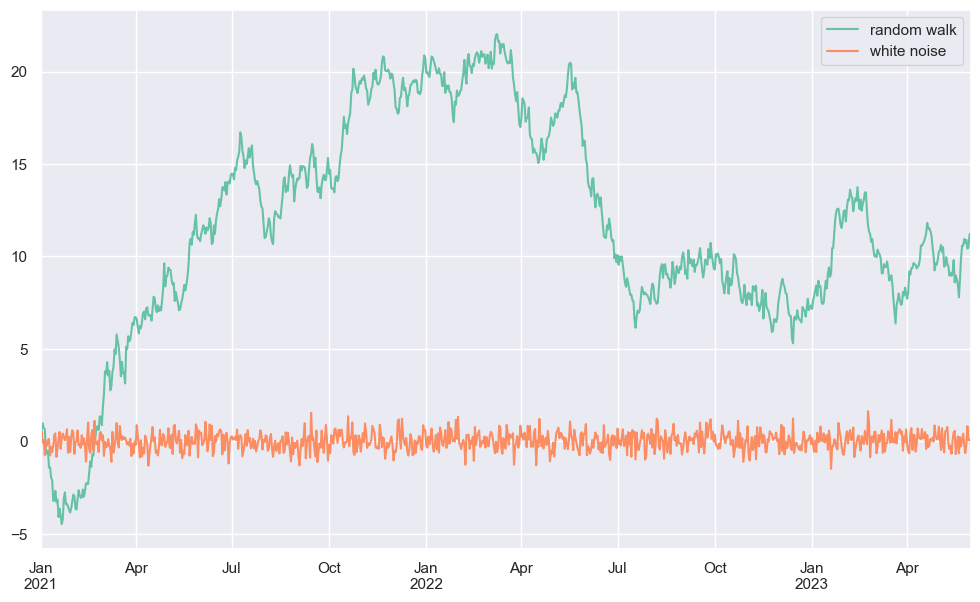

In [45]:
def build_graph(nobs=881):
    dts = pd.date_range(start="2021-01-01", periods=nobs)
    rw = pd.Series(random_walk(nobs), index=dts)
    wn = pd.Series(white_noise(nobs), index=dts)
    df = pd.concat([rw, wn], axis=1)
    df.columns = ["random walk", "white noise"]
    df.plot(figsize=(12, 7), use_index=True)

build_graph()

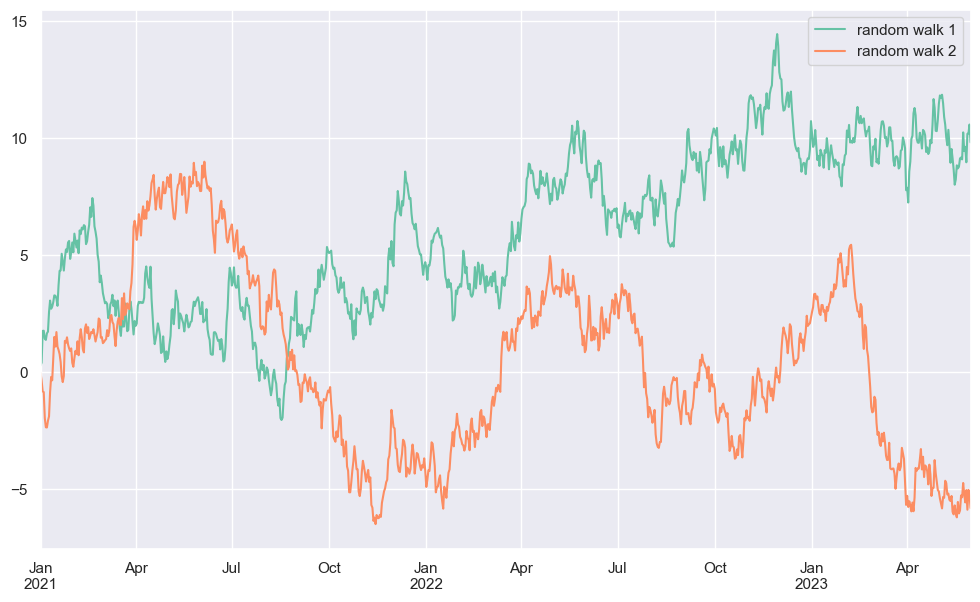

In [46]:
def two_rws(nobs=881):
    dts = pd.date_range(start="2021-01-01", periods=nobs)
    rw1 = pd.Series(random_walk(nobs), index=dts)
    rw2 = pd.Series(random_walk(nobs), index=dts)
    df = pd.concat([rw1, rw2], axis=1)
    df.columns = ["random walk 1", "random walk 2"]
    df.plot(figsize=(12, 7), use_index=True)

two_rws()

# Stationarity test: ADF test

In [47]:
from statsmodels.tsa.stattools import adfuller

rw = random_walk(881)
wn = white_noise(881)

# use regression="nc" for statsmodels <=0.12.2 else regression="n"
adf_stat, pval, lags, obs, crit_vals, icbest = adfuller(rw, regression="nc")
print(f"ADF statistic: {adf_stat}")
print(f"p-value: {pval}")
print(f"Critical values: {crit_vals}")

ADF statistic: 1.0031564855219521
p-value: 0.9163867558262075
Critical values: {'1%': -2.5682882665299926, '5%': -1.9413098837350766, '10%': -1.6165213137336516}


C:\Users\rutuj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


since the p-value (0.1028) is greater than the typical significance level of 0.05, you would not have enough evidence to reject the null hypothesis. This suggests that the time series in question does not exhibit clear stationarity characteristics and may be closer to a random walk or non-stationary process.
Not stationary as p-val>0.05

In [48]:
adf_stat, pval, lags, obs, crit_vals, icbest = adfuller(wn, regression="nc")
print(f"ADF statistic: {adf_stat}")
print(f"p-value: {pval}")
print(f"Critical values: {crit_vals}")

ADF statistic: -29.523763320237926
p-value: 0.0
Critical values: {'1%': -2.568285365444215, '5%': -1.941309526755318, '10%': -1.6165216492475112}


C:\Users\rutuj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(


In [49]:
df.head()

,volume
date,
2021-01-01,99.0
2021-01-02,15.0
2021-01-03,50.0
2021-01-04,61.0
2021-01-05,63.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2021-01-01 to 2023-05-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  881 non-null    float64
dtypes: float64(1)
memory usage: 13.8 KB
